In [1]:
import re
from pandas import DataFrame
import numpy as np
import matplotlib.font_manager as fm
import os
import matplotlib.pyplot as plt
import pandas as pd
from konlpy.tag import Kkma
import nltk
kkma = Kkma()
from wordcloud import WordCloud
from konlpy.tag import Twitter
from collections import Counter

In [2]:
#csv 불러오기
df = pd.read_csv('C:/Users/User/Desktop/마케팅_전처리/브랜드마케팅.csv',encoding = 'utf-8')
df

,주요 업무,자격요건 및 우대사항
0,파워볼PGB게임 시장분석 및 단계별 브랜딩 전략 수립 전반 게임 광고 기획 제작 ...,필수 포트폴리오 보유자 5년 이상의 웹보드 스포츠 등 게임 또는 관련 분야의 마케...
1,CRM 마케터 및 디지털 마케터 글로벌 브랜드의 이탈 방지 구매 유도 리텐션 등 ...,CRM 경력 3년 이상 다양한 유관부서 개발자 DBA 디자이너 마케터 등 과의 협...
2,1 국내외 인플루언서 마케팅 시장 동향 리서치 및 분석 2 피처링 웹사이트내 블로그...,1 인플루언서 마케팅커머스에 관심 있으신 분 2 인플루언서 마케팅 커리어를 만들고 ...
3,메타구글네이버카카오 등 Paid 매체 광고 운영 광고 매체별 데이터 분석 및 인사...,D2C 커머스 퍼포먼스 마케팅 경력 1년 이상 메타구글네이버카카오 등의 Paid ...
4,메타구글카카오GFA 등 광고 채널 관리 퍼포먼스 광고 집행관리 인플루언서 바이럴 ...,경력 년수 무관 메타자사몰 광고마케팅 등 다양한 매체 경험이 있는 분 엑셀문서 정...
...,...,...
190,글로벌사업팀 해외 제품마케터해외 인플루언서 섭외 및 마케팅 협업 체계 구축제품마케...,경력 및 국적 무관 신입 지원가능 원활한 외국어 사용 가능하신 분 영어 일본어 베트...
191,브랜드 진단 및 전략 방향성 수립 브랜드 네임 슬로건 및 스토리 개발 브랜드 ...,전략과 실행 간 끊김 없는 종합적인 브랜딩을 경험하기 원하시는 분전략적 사고 창의적...
192,브랜딩을 목적으로 방향성을 설정하고 전반적인 기획 및 판매 업무를 담당합니다제품 기...,학력무관 동종업계 3년 이상 근무인턴계약 종료 후 정규직 전환시 결격사유가 없으신 ...
193,벳칭 프로덕트 기획 및 관리 벳칭 주요 마케팅 및 영업 에셋 기획 제작서비스 소개...,계획실행확인조치PDCA 사이클와 같이 구조적인 업무 수행이 가능한 분 회사 및 제...


In [3]:
#사용할 column 선택
df = df[['자격요건 및 우대사항']]
df

,자격요건 및 우대사항
0,필수 포트폴리오 보유자 5년 이상의 웹보드 스포츠 등 게임 또는 관련 분야의 마케...
1,CRM 경력 3년 이상 다양한 유관부서 개발자 DBA 디자이너 마케터 등 과의 협...
2,1 인플루언서 마케팅커머스에 관심 있으신 분 2 인플루언서 마케팅 커리어를 만들고 ...
3,D2C 커머스 퍼포먼스 마케팅 경력 1년 이상 메타구글네이버카카오 등의 Paid ...
4,경력 년수 무관 메타자사몰 광고마케팅 등 다양한 매체 경험이 있는 분 엑셀문서 정...
...,...
190,경력 및 국적 무관 신입 지원가능 원활한 외국어 사용 가능하신 분 영어 일본어 베트...
191,전략과 실행 간 끊김 없는 종합적인 브랜딩을 경험하기 원하시는 분전략적 사고 창의적...
192,학력무관 동종업계 3년 이상 근무인턴계약 종료 후 정규직 전환시 결격사유가 없으신 ...
193,계획실행확인조치PDCA 사이클와 같이 구조적인 업무 수행이 가능한 분 회사 및 제...


In [4]:
#txt로 저장
i = 'C:/Users/User/Desktop/마케팅_전처리/브랜드마케팅(자격요건 및 우대사항).txt'
df.to_csv(i, sep = "\t", index = False, encoding='utf-8')

In [5]:
from konlpy.corpus import kobill
doc_ko = open(i, encoding='utf-8').read()
doc_ko

'자격요건 및 우대사항\n 필수 포트폴리오 보유자 5년 이상의 웹보드 스포츠 등 게임 또는 관련 분야의 마케팅 경험자 콘텐츠 기획부터 제작 배포 리뷰에 이르는 과정을 주도적으로 실행하신 분 데이터 기반의 마케팅 전략 수립 실행을 경험하신 분 트렌드에 민감하고 유저중심의 사고에 익숙하신 분 우대 스타트업 업무 경험자\n CRM 경력 3년 이상 다양한 유관부서 개발자 DBA 디자이너 마케터 등 과의 협업에 능하신 분 데이터에 기반하여 성과를 분석하고 커뮤니케이션하는 업무방식에 익숙하신 분 디지털 이벤트 기획 경험자 해외여행에 결격사유가 없는 자  소비자 구매와 관련된 CRM 저니 설계를 해보신 분 SFMC 및 CDP 경험자 CRM 솔루션 경험자 SQL GA Appsflyer 등 트래킹 툴 실무 적용 경험 소비자 대상 메시지 작성에 어려움이 없는 분 간결한 글쓰기 스타트업 경력자 또는 스타트업 근무 희망자  글로벌 브랜드 및 국내 브랜드 등 의 마케팅 경험 가설 수립 및 검증에 대한 설계 경험이 있으신 분\n1 인플루언서 마케팅커머스에 관심 있으신 분 2 인플루언서 마케팅 커리어를 만들고 싶은 분 3 고객의 마음을 움직이는 스토리텔링 능력이 있으신 분 1 어도비 스케치 피그마 등 프로그램을 기본적으로 다룰 수 있으신 분 2 카피라이팅 스토리텔링 능력이 있으신 분 3 B2B 세일즈 마케팅 경험이 있으신 분 4 인플루언서 및 MCN 관련 업무에 대한 관심 및 인사이트가 많은 분5 소셜미디어 플랫폼Instagram Youtube Tiktok 네이버 블로그 등에 대한 이해도가 높은 분\n D2C 커머스 퍼포먼스 마케팅 경력 1년 이상 메타구글네이버카카오 등의 Paid 매체에서 성과를 개선한 경험이 있는 분 능동적인 업무태도와 빠른 실행력을 바탕으로 문제해결에 뛰어나신 분 꼼꼼하고 체계적인 업무스타일을 보유하신 분 D2C 미디어커머스 스타트업 재직 경험 직접전환 목적의 광고 콘텐츠에 대한 인사이트가 많으신 분 다양한 매체의 미디어 믹스를 논리적으로 구성하여 높은 효율을 내보

In [6]:
from konlpy.tag import Okt; t = Okt()
tokens_ko = t.nouns(doc_ko)
tokens_ko

['자격',
 '요건',
 '및',
 '우대',
 '사항',
 '필수',
 '포트폴리오',
 '보유',
 '이상',
 '웹',
 '보드',
 '스포츠',
 '등',
 '게임',
 '관련',
 '분야',
 '마케팅',
 '경험',
 '콘텐츠',
 '기획',
 '제작',
 '배포',
 '리뷰',
 '과정',
 '주도',
 '실행',
 '분',
 '데이터',
 '기반',
 '마케팅',
 '전략',
 '수립',
 '실행',
 '경험',
 '분',
 '트렌드',
 '유저',
 '중심',
 '사고',
 '분',
 '우대',
 '스타트업',
 '업무',
 '경험',
 '경력',
 '이상',
 '유관',
 '부서',
 '개발자',
 '디자이너',
 '마케터',
 '등',
 '협업',
 '능',
 '분',
 '데이터',
 '기반',
 '성과',
 '분석',
 '커뮤니케이션',
 '업무',
 '방식',
 '분',
 '디지털',
 '이벤트',
 '기획',
 '경험',
 '해외여행',
 '결격',
 '사유',
 '자',
 '소비자',
 '구매',
 '관련',
 '저니',
 '설계',
 '분',
 '및',
 '경험',
 '솔루션',
 '경험',
 '등',
 '트래킹',
 '툴',
 '실무',
 '적용',
 '경험',
 '소비자',
 '대상',
 '메시지',
 '작성',
 '어려움',
 '분',
 '글쓰기',
 '스타트업',
 '경력',
 '스타트업',
 '근무',
 '희망',
 '글로벌',
 '브랜드',
 '및',
 '국내',
 '브랜드',
 '등',
 '의',
 '마케팅',
 '경험',
 '가설',
 '수립',
 '및',
 '검증',
 '대한',
 '설계',
 '경험',
 '분',
 '인',
 '플루',
 '마케팅',
 '커머스',
 '관심',
 '분',
 '인',
 '플루',
 '마케팅',
 '커리어',
 '분',
 '고객',
 '마음',
 '스토리텔링',
 '능력',
 '분',
 '어도비',
 '스케치',
 '피',
 '마',
 '등',
 '프로그램',
 '기본',
 '수',


In [7]:
ko = nltk.Text(tokens_ko, name = 'work')
print(len(ko.tokens))
print(len(set(ko.tokens)))
ko.vocab()

9577
877


FreqDist({'분': 935, '경험': 392, '마케팅': 228, '및': 207, '경력': 200, '이상': 182, '콘텐츠': 152, '등': 146, '대한': 138, '보유': 119, ...})

In [8]:
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="C:\Windows\Fonts\malgun.ttf").get_name()
rc('font', family=font_name)

In [9]:
stop_words = [
    '필수','가능','우대','경험','관심','활용','관련','능력','이해도','대한','보유','이상','실행','디지털','제안','플루','인','제작','수립','신규','업무','사','경력','분','및','해결', '일', '등', '직', '더', '위', '수', '팀', '자사', '마','피', '내']

ko = [each_word for each_word in ko if each_word not in stop_words]
ko

['자격',
 '요건',
 '사항',
 '포트폴리오',
 '웹',
 '보드',
 '스포츠',
 '게임',
 '분야',
 '마케팅',
 '콘텐츠',
 '기획',
 '배포',
 '리뷰',
 '과정',
 '주도',
 '데이터',
 '기반',
 '마케팅',
 '전략',
 '트렌드',
 '유저',
 '중심',
 '사고',
 '스타트업',
 '유관',
 '부서',
 '개발자',
 '디자이너',
 '마케터',
 '협업',
 '능',
 '데이터',
 '기반',
 '성과',
 '분석',
 '커뮤니케이션',
 '방식',
 '이벤트',
 '기획',
 '해외여행',
 '결격',
 '사유',
 '자',
 '소비자',
 '구매',
 '저니',
 '설계',
 '솔루션',
 '트래킹',
 '툴',
 '실무',
 '적용',
 '소비자',
 '대상',
 '메시지',
 '작성',
 '어려움',
 '글쓰기',
 '스타트업',
 '스타트업',
 '근무',
 '희망',
 '글로벌',
 '브랜드',
 '국내',
 '브랜드',
 '의',
 '마케팅',
 '가설',
 '검증',
 '설계',
 '마케팅',
 '커머스',
 '마케팅',
 '커리어',
 '고객',
 '마음',
 '스토리텔링',
 '어도비',
 '스케치',
 '프로그램',
 '기본',
 '카피라이팅',
 '스토리텔링',
 '마케팅',
 '인사이트',
 '소셜미디어',
 '플랫폼',
 '네이버',
 '블로그',
 '커머스',
 '퍼포먼스',
 '마케팅',
 '메타',
 '구글',
 '네이버',
 '카카오',
 '매체',
 '성과',
 '개선',
 '능동',
 '태도',
 '바탕',
 '문제해결',
 '체계',
 '스타일',
 '미디어',
 '커머스',
 '스타트업',
 '재직',
 '직접',
 '전환',
 '목적',
 '광고',
 '콘텐츠',
 '인사이트',
 '매체',
 '미디어',
 '믹스',
 '논리',
 '구성',
 '효율',
 '보신',
 '적',
 '엑셀',
 '데이터',
 '정리',
 '시각',
 '년수',
 '무관',
 '메타',


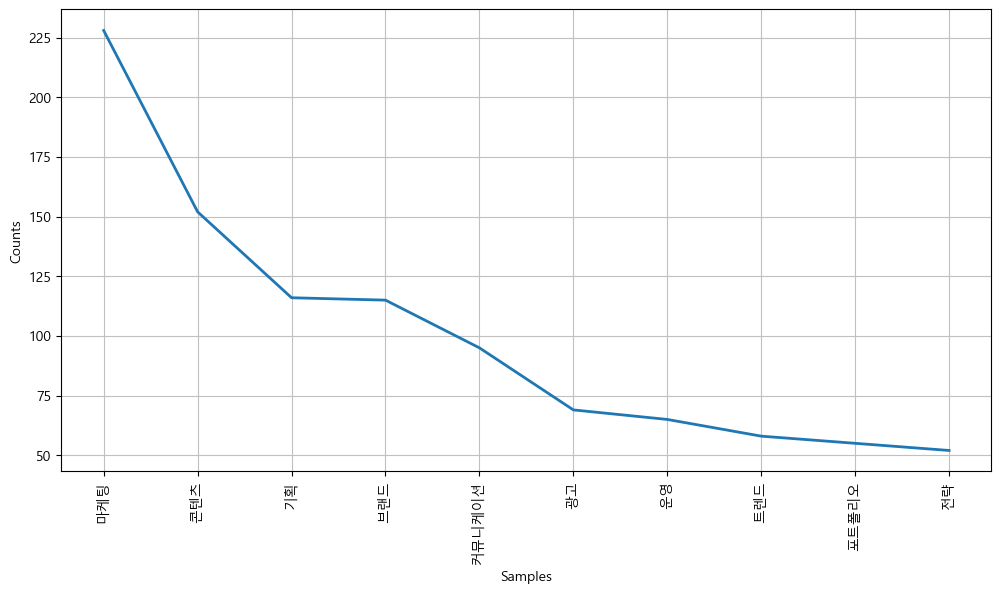

In [10]:
ko = nltk.Text(ko, name= 'Work')
plt.figure(figsize=(12,6))
ko.plot(10)
plt.show()

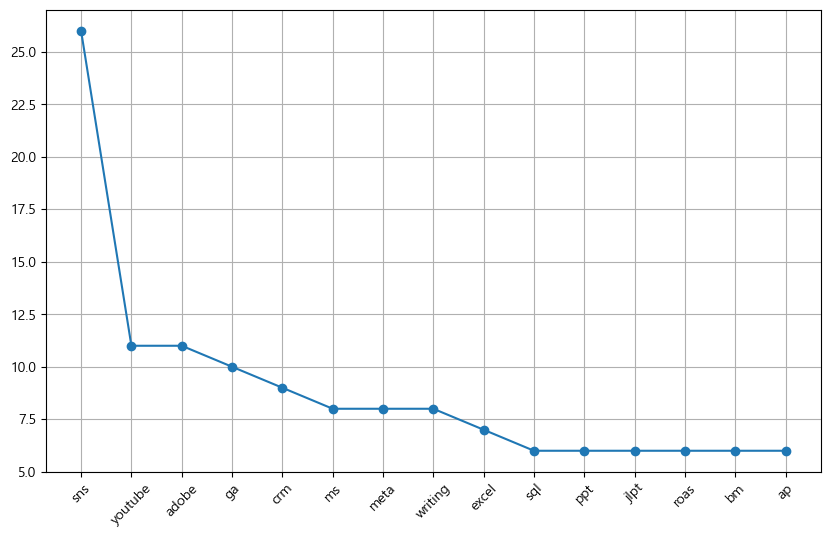

In [12]:
from langdetect import detect, DetectorFactory
from langdetect.lang_detect_exception import LangDetectException
from nltk.corpus import stopwords

# NLTK 불용어 목록 로드
stop_words = set(stopwords.words('english'))

#불용어 목록 추가
user_defined_stopwords = ['ex','strong','enjoy','pc','journey','work','etc','face','wallet','success','problem','solving','restful','office','back','service','skill','tool']
stop_words.update(user_defined_stopwords)

# 파일에서 텍스트를 읽는 함수
def read_file(file_name):
    with open(file_name, 'r', encoding='utf-8') as file:
        text = file.read()
    return text

# 텍스트를 영어 단어로만 토큰화하는 함수
def tokenize(text):
    words = re.findall(r'\b[a-zA-Z]+\b', text.lower())
    filtered_words = [word for word in words if word not in stop_words]
    return filtered_words

# 단어 빈도를 줄 그래프로 그리는 함수
def plot_word_frequencies(frequencies):
    sorted_words = sorted(frequencies.items(), key=lambda x: x[1], reverse=True)

    words = [word for word, count in sorted_words[:15]]
    counts = [count for word, count in sorted_words[:15]]

    plt.figure(figsize=(10, 6))
    plt.plot(words, counts, marker='o')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()


# 메인 스크립트
file_name = i
text = read_file(file_name)
words = tokenize(text)
word_frequencies = Counter(words)
plot_word_frequencies(word_frequencies)